<a href="https://colab.research.google.com/github/lm0ri/notebook/blob/main/Ti_diamo_il_benvenuto_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install --upgrade google-cloud-bigquery

from google.colab import auth
auth.authenticate_user()

project_id = "skyita-da-ds-common"


import pandas as pd
from google.cloud import bigquery

client = bigquery.Client(project=project_id)

In [6]:
# import pandas as pd
query= """
select * from `skyita-da-data-analyst-cfo.ds_personal_dataset_cfo_leonardomori.promonotclassified`
"""
query_job = client.query(query)
df=query_job.to_dataframe()
df.head()

,record_type_name,cod_promo,des_promo
0,BB,1501126,"FW200 20,90€ 12M_AF29€_NPP - CODICE PROMO: 150..."
1,BB,1501122,"FIBRA 20,90€ 12M_AF29€_NPP - CODICE PROMO: 150..."
2,BB,1501118,"FW100 20,90€+VU 12M_AF29€_NPP - CODICE PROMO: ..."
3,BB,1401058,"PIVA_INT21,5VU12M_POI28,6_AF29 - CODICE PROMO:..."
4,BB,1401063,"P_IVA_INT+VU+SPOT32,5_AF29€_LL - CODICE PROMO:..."


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('cod_promo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('des_promo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['des_promo'].value_counts()
    for x_label, grp in _df_2.groupby('cod_promo')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('cod_promo')
_ = plt.ylabel('des_promo')

In [10]:
# import pandas as pd
query= """
select date(partition_date), count(distinct(id_contract)), sum(arpu_net) from `skyita-da-daita-prod.arpu_enriched.arpu_cb_tv`
where partition_date >= '2024-07-01'
group by all
"""
query_job = client.query(query)
df=query_job.to_dataframe()
df.head()

,f0_,f1_,f2_
0,2025-07-01,2796990,1.215619e+08
1,2025-07-04,2792623,1.218358e+08
2,2025-07-06,2792767,1.217852e+08
3,2025-07-03,2792415,1.218851e+08
4,2025-07-05,2792757,1.218094e+08


from matplotlib import pyplot as plt
_df_0['f1_'].plot(kind='hist', bins=20, title='f1_')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['f2_'].plot(kind='hist', bins=20, title='f2_')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='f1_', y='f2_', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['f1_'].plot(kind='line', figsize=(8, 4), title='f1_')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['f2_'].plot(kind='line', figsize=(8, 4), title='f2_')
plt.gca().spines[['top', 'right']].set_visible(False)

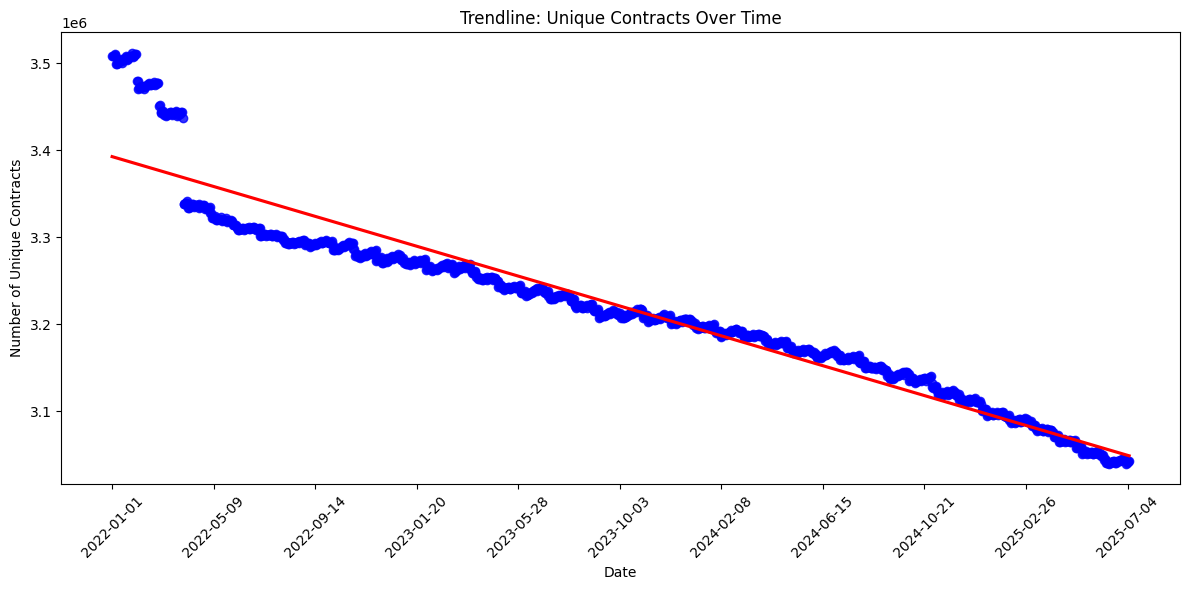

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Query BigQuery
query = """
SELECT
  DATE(partition_date) AS date,
  COUNT(DISTINCT id_contract) AS num_contracts
FROM (select id_contract, date(partition_date) as partition_date from `skyita-da-daita-prod.arpu_enriched.arpu_cb_tv`
group by all
union all
select
id_contract,
date(partition_date) as partition_date  from `skyita-da-daita-prod.arpu_enriched.arpu_cb_ma`
group by all)
WHERE partition_date >= '2020-01-01'
GROUP BY date
ORDER BY date
"""

query_job = client.query(query)
df = query_job.to_dataframe()

# ✅ Assicurati che la colonna date sia datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# ✅ Crea colonna numerica per regressione
df['date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)

# ✅ Plot regressione contratti nel tempo
plt.figure(figsize=(12, 6))
sns.regplot(
    data=df,
    x='date_ordinal',
    y='num_contracts',
    ci=None,
    scatter_kws={'color': 'blue'},
    line_kws={'color': 'red'}
)

# Etichette leggibili sull'asse x
tick_spacing = max(len(df) // 10, 1)
xticks = df['date_ordinal'][::tick_spacing]
xlabels = df['date'].dt.strftime('%Y-%m-%d')[::tick_spacing]

plt.xticks(ticks=xticks, labels=xlabels, rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of Unique Contracts")
plt.title("Trendline: Unique Contracts Over Time")
plt.tight_layout()
plt.show()
